In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%pylab inline
#%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
# os.listdir("../input")
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv('Hotel_Reviews.csv')
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

# EDA, Data Pre-Processing

In [3]:
# data overview
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  515738
Columns  :  17

Features :  ['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 'days_since_review', 'lat', 'lng']

Missing values :   6536

Unique values :  
 Hotel_Address                                   1493
Additional_Number_of_Scoring                     480
Review_Date                                      731
Average_Score                                     34
Hotel_Name                                      1492
Reviewer_Nationality                             227
Negative_Review                               330011
Review_Total_Negative_Word_Counts                402
Total_Number_of_Reviews                         1142
Positive_Review                               412601
Review_Total

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Review_Date                                   515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null flo

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [5]:
# drop the rows having null values for reviews text
# df = df.dropna(subset=['reviews.text'])

In [6]:
# there are many duplicate reviews (exact same comments in reviews.text)
# but I am not going to clean the data yet, so I just use the data as it is, to go through the learning process.
#df['reviews'].value_counts()[10:50]

## **How are the ratings distributed?**

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


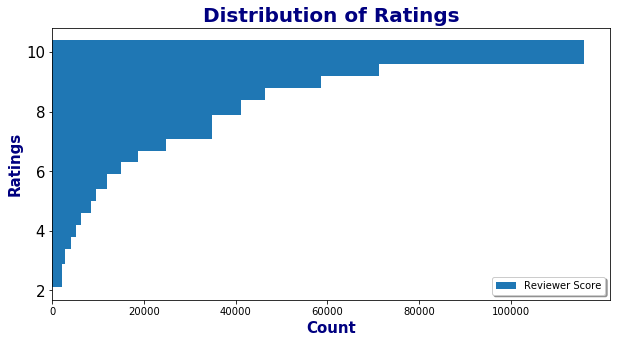

In [7]:
# Plot ratings frequency
plt.figure(figsize = [10,5])   # [width, height]

x = list( df['Reviewer_Score'].value_counts().index )
y = list( df['Reviewer_Score'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 100000, 6)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviewer Score'], shadow=True, loc=4)


## **What words do people use in their reviews?**

In [8]:
df['reviews'] = df['Negative_Review'] + df['Positive_Review']

In [9]:
# remove 'No Negative' or 'No Positive' from text
df["reviews"] = df["reviews"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [10]:
# remove 'No Negative' or 'No Positive' from text
df['Negative_Review'] = df["reviews"].apply(lambda x: x.replace("No Negative", ""))

In [11]:
# remove 'No Negative' or 'No Positive' from text
df['Positive_Review'] = df["reviews"].apply(lambda x: x.replace("No Positive", ""))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Review_Date                                   515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null flo

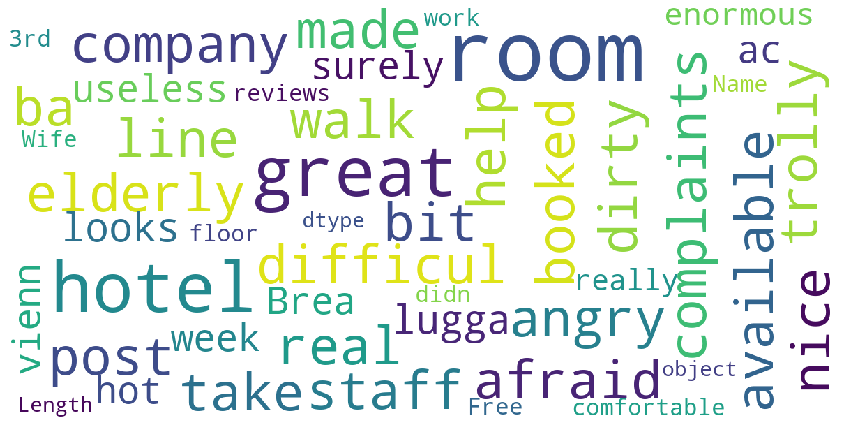

In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews'])

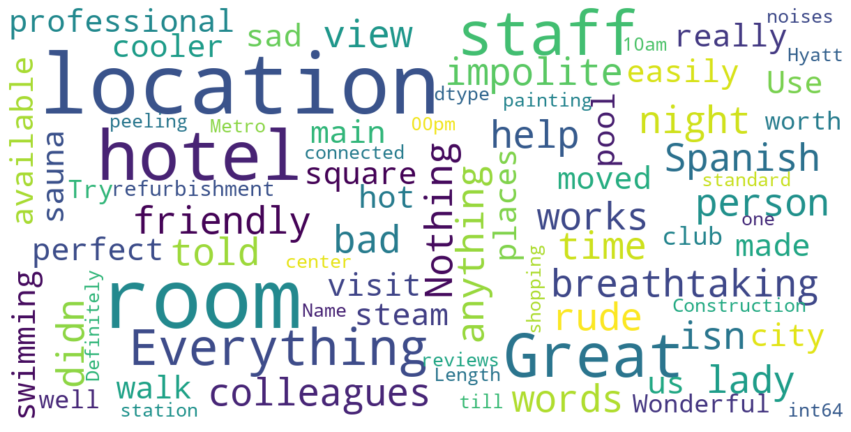

In [14]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['reviews'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

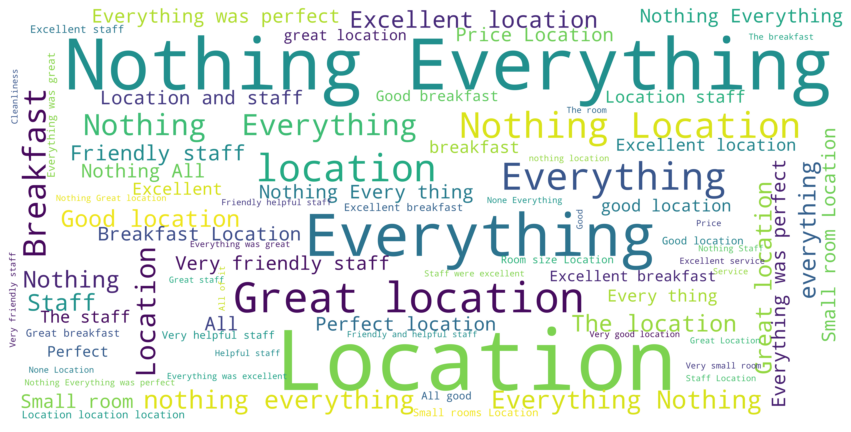

In [15]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['reviews'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

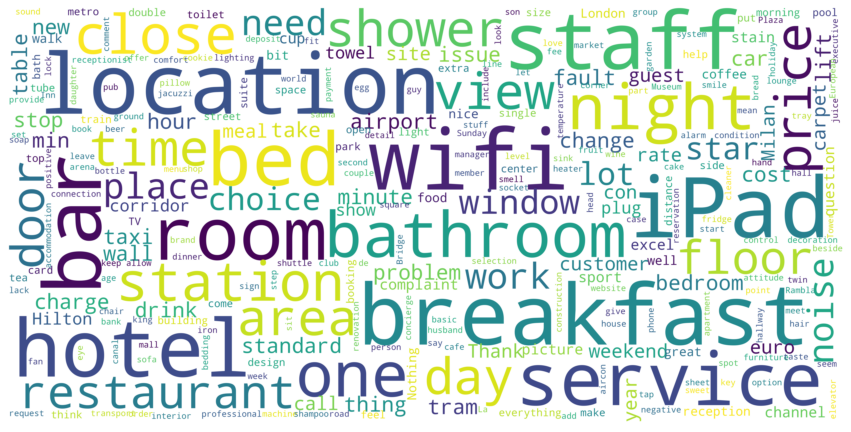

In [16]:
# try to tokenize to individual word (uni-gram) - reviews
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
len(big_list)  # reviews

18377564

### Postive Reviews

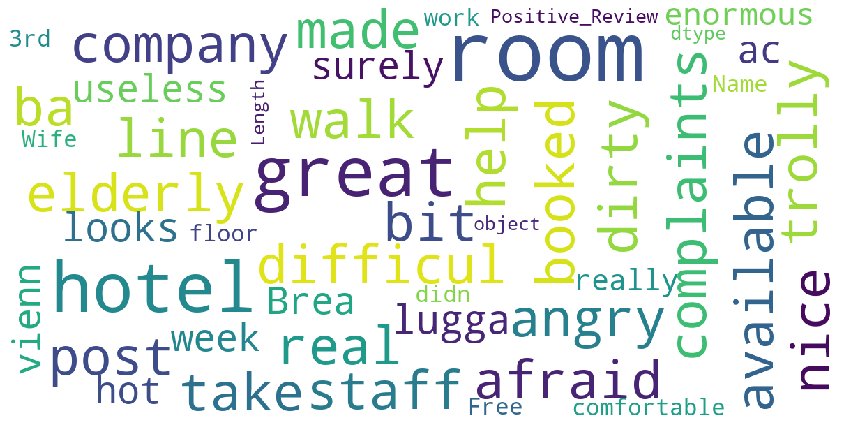

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Positive_Review'])

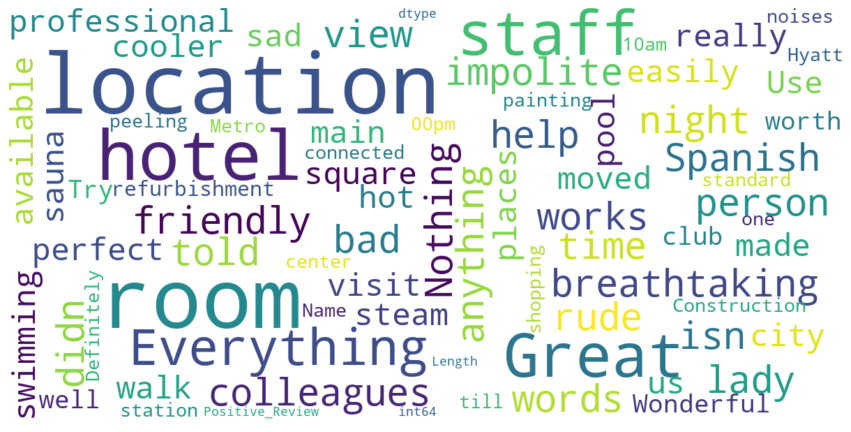

In [19]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Positive_Review'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

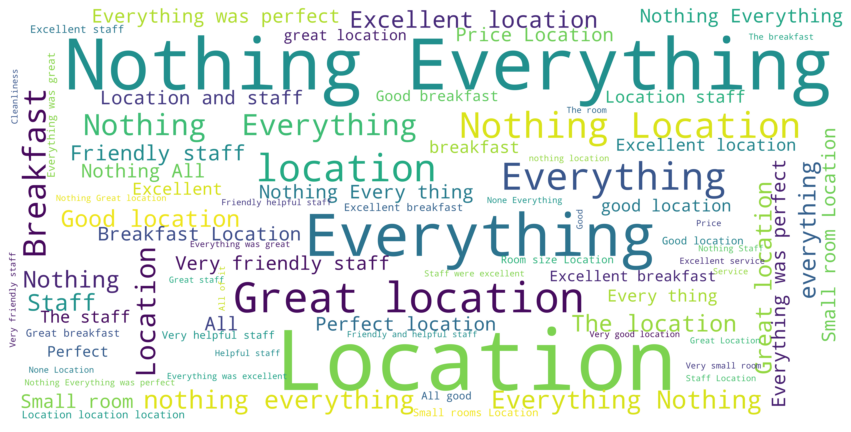

In [20]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['Positive_Review'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

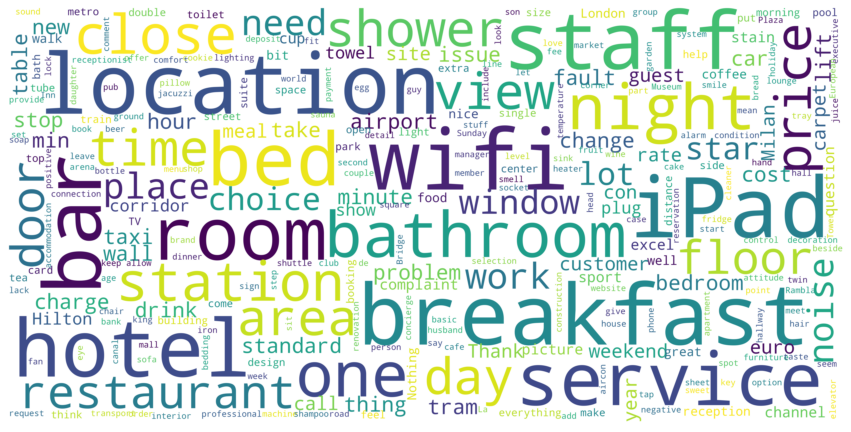

In [21]:
# try to tokenize to individual word (uni-gram) - reviews
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['Positive_Review'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Negative Reviews

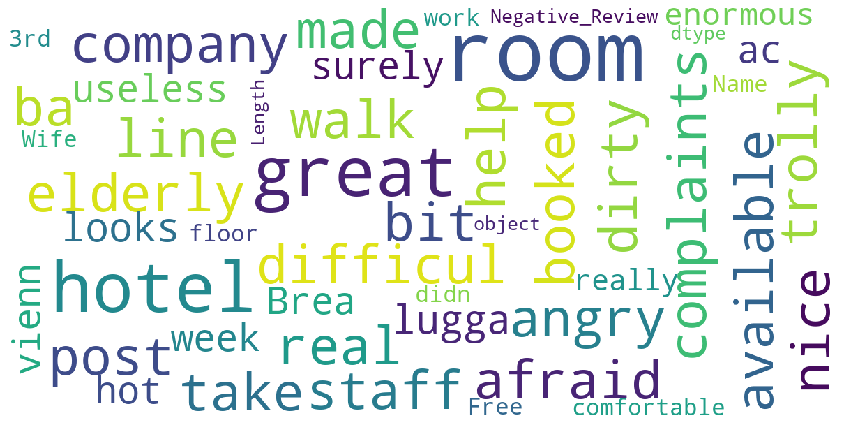

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Negative_Review'])

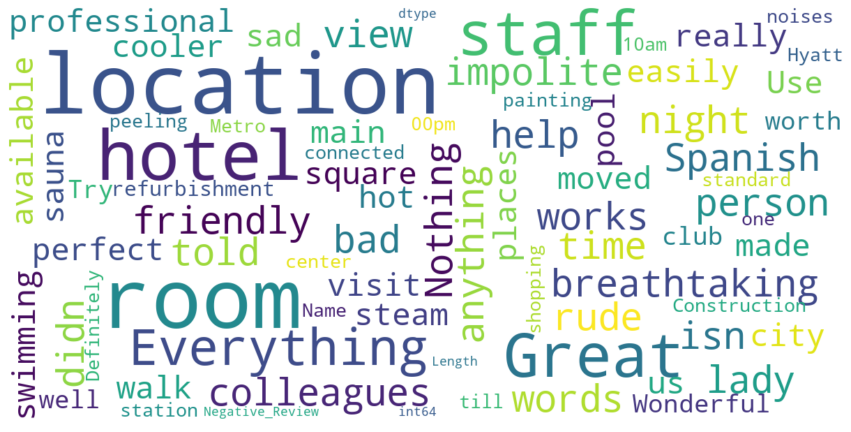

In [23]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Negative_Review'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

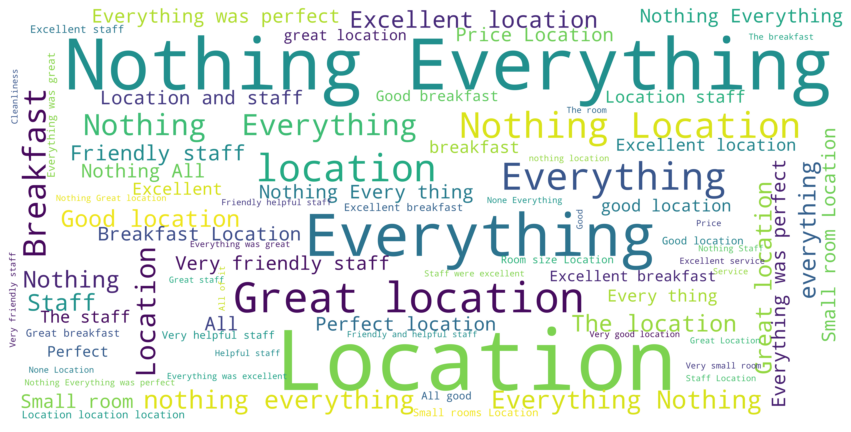

In [24]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['Negative_Review'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

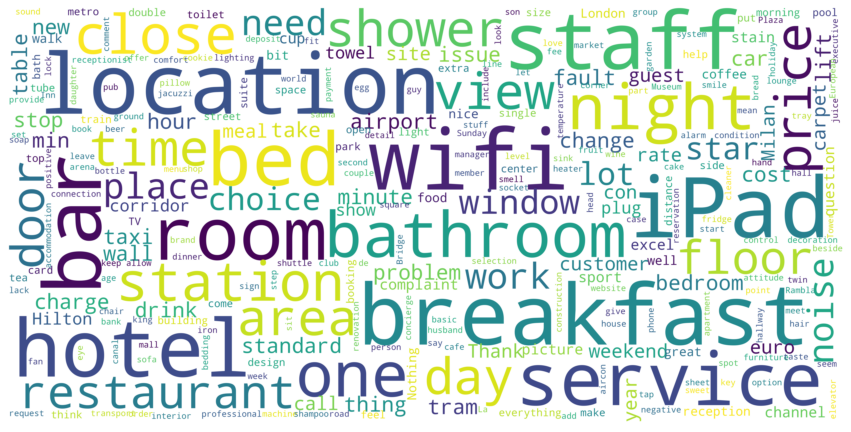

In [25]:
# try to tokenize to individual word (uni-gram) - reviews
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['Negative_Review'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
df1 = df[df['Reviewer_Score']<5]
# keep relevant columns only
df1 = df1[['Reviewer_Score', 'reviews']]
df1

Reviewer_Score                                            reviews
0                  2.9   I am so angry that i made this post available...
3                  3.8   My room was dirty and I was afraid to walk ba...
6                  4.6   Cleaner did not change our sheet and duvet ev...
12                 4.6   The floor in my room was filfy dirty Very bas...
21                 3.8   Our room was an overrated disaster room 231 d...
...                ...                                                ...
515661             3.8   Can t even stop the car to unload in front of...
515677             3.8      Being 4star hotel except breakfast  Breakfast
515700             3.8   Room vas located in different building with n...
515728             4.2                                 Everything Nothing
515735             2.5   The ac was useless It was a hot week in vienn...

[22281 rows x 2 columns]

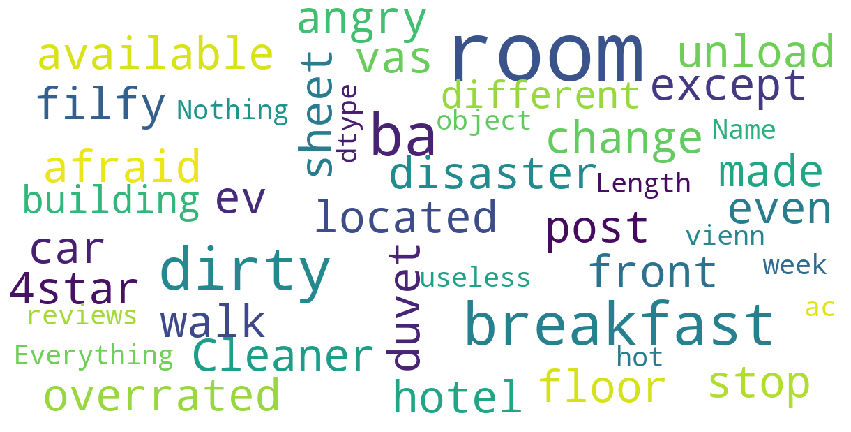

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df1['reviews'])

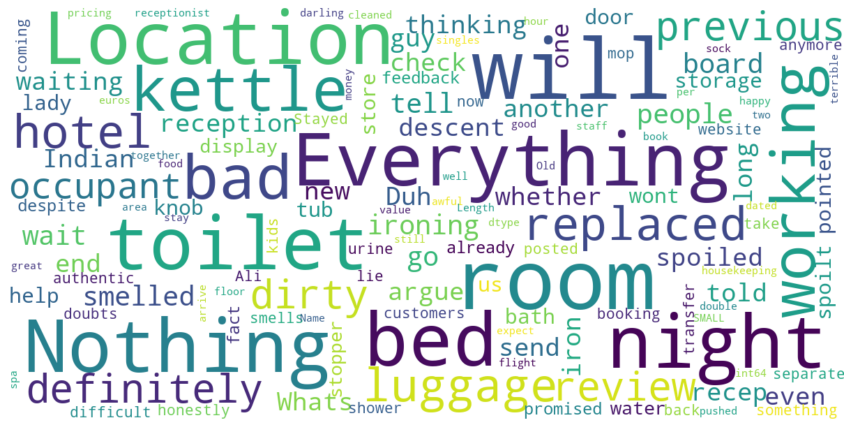

In [28]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df1['reviews'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

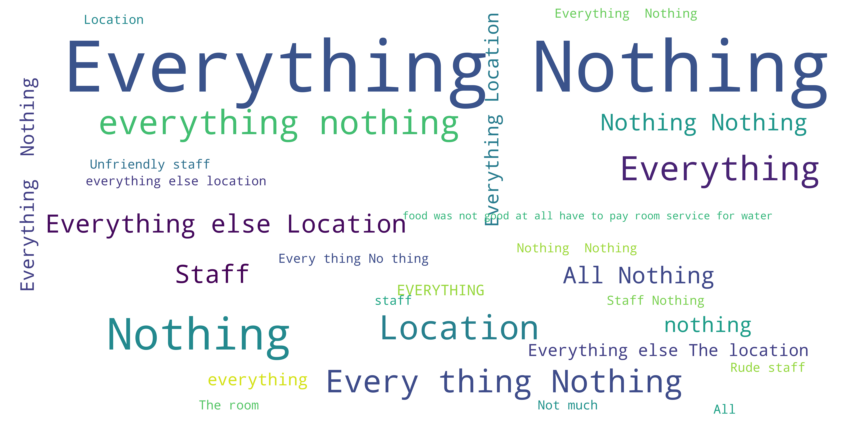

In [29]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df1['reviews'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

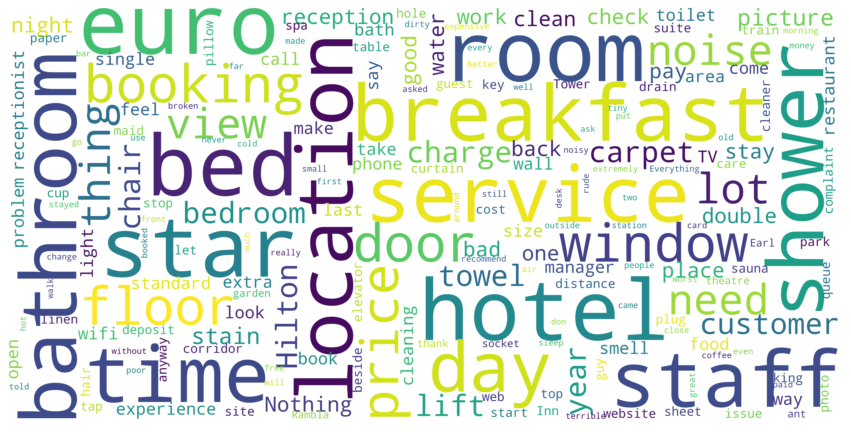

In [30]:
# try to tokenize to individual word (uni-gram) - reviews
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df1['reviews'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
# Let's see what are the popular hotels reviewed
df['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Le Lavoisier                                           12
Ibis Styles Milano Palmanova                           12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

In [32]:
# Let's see what are the nationality of the reviewer 
df['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Comoros                           1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

## Visualise the correlation map

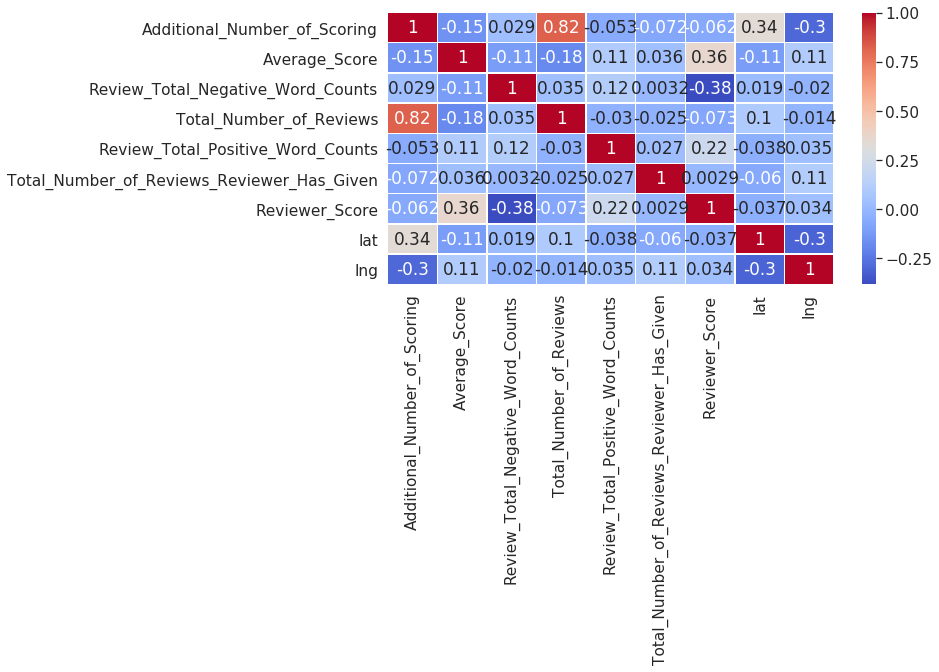

In [33]:
# not much info in the correlation map
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

## Which are the most popular hotel reviewed

In [34]:
df1=df[df['Reviewer_Score']==10]

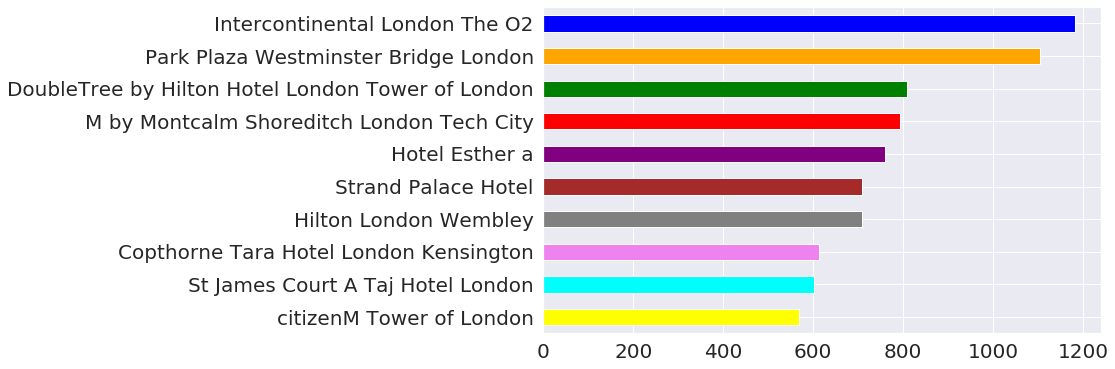

In [35]:
df1['Hotel_Name'].value_counts()[0:10].plot('barh', figsize=[10,6], fontsize=20,color=('blue', 'orange', 'green', 'red', 'purple','brown','grey','violet','cyan','yellow')).invert_yaxis()

In [36]:
plt.savefig('plot_name.png', dpi = 300)

<Figure size 432x288 with 0 Axes>

In [37]:
# filter rating =10 

df1 = df[df['Reviewer_Score']==10]
# keep relevant columns only
df1 = df1[[ 'Reviewer_Score', 'reviews']]
df1

Reviewer_Score                                            reviews
7                 10.0   Apart from the price for the brekfast Everyth...
10                10.0   Nothing all great  Rooms were stunningly deco...
15                10.0   This hotel is awesome I took it sincirely bec...
48                10.0   The quality of the hotel was brilliant and ev...
52                10.0   I loved everything  The location in a quiet p...
...                ...                                                ...
515698            10.0   Staff were very helpful Location was great fo...
515699            10.0   Good position close to the metro station in q...
515711            10.0   room was a bit small but it s OK  Bed was goo...
515729            10.0   The breakfast was excelent lots of fress frui...
515732            10.0   helpful staff allowed me to check in early as...

[115853 rows x 2 columns]

In [44]:
df1.to_csv('Happy_Customers.csv', index = False)
# Refer to 
# unsupervised_topic_modeling_good_review.ipynb

In [39]:
df2=df[df['Reviewer_Score']<5]

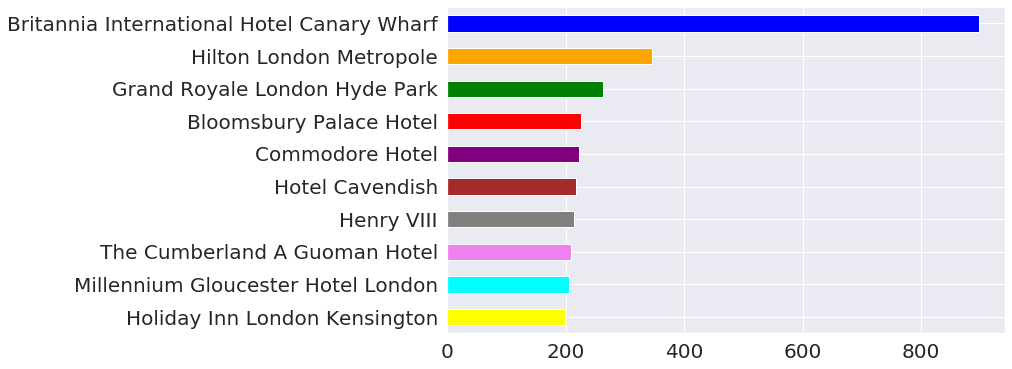

In [40]:
df2['Hotel_Name'].value_counts()[0:10].plot('barh', figsize=[10,6], fontsize=20,color=('blue', 'orange', 'green', 'red', 'purple','brown','grey','violet','cyan','yellow')).invert_yaxis()

In [41]:
# filter review with less than 5 rating

df2 = df[df['Reviewer_Score']<5]
# keep relevant columns only
df2 = df2[[ 'Reviewer_Score', 'reviews']]
df2

Reviewer_Score                                            reviews
0                  2.9   I am so angry that i made this post available...
3                  3.8   My room was dirty and I was afraid to walk ba...
6                  4.6   Cleaner did not change our sheet and duvet ev...
12                 4.6   The floor in my room was filfy dirty Very bas...
21                 3.8   Our room was an overrated disaster room 231 d...
...                ...                                                ...
515661             3.8   Can t even stop the car to unload in front of...
515677             3.8      Being 4star hotel except breakfast  Breakfast
515700             3.8   Room vas located in different building with n...
515728             4.2                                 Everything Nothing
515735             2.5   The ac was useless It was a hot week in vienn...

[22281 rows x 2 columns]

In [43]:
df2.to_csv('unhappy_customer.csv', index = False)
# Refer to 
# unsupervised_topic_modeling_bad_review.ipynb